In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    classification_report,
    precision_recall_curve
)
from sklearn.tree import DecisionTreeClassifier # árbol de decisión para clasificación
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
heart_disease = fetch_openml(name="heart-statlog")
type(heart_disease)

sklearn.utils._bunch.Bunch

In [ ]:
heart_disease.data

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [ ]:
df = heart_disease.data.copy()
df

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [ ]:
heart_disease.target

,class
0,present
1,absent
2,present
3,absent
4,absent
...,...
265,absent
266,absent
267,absent
268,absent


In [ ]:
df['class'] = heart_disease.target
df

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,present
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,absent
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,present
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,absent
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,absent
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,absent
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,absent
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,absent


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   age                                   270 non-null    int64   
 1   sex                                   270 non-null    int64   
 2   chest                                 270 non-null    int64   
 3   resting_blood_pressure                270 non-null    int64   
 4   serum_cholestoral                     270 non-null    int64   
 5   fasting_blood_sugar                   270 non-null    int64   
 6   resting_electrocardiographic_results  270 non-null    int64   
 7   maximum_heart_rate_achieved           270 non-null    int64   
 8   exercise_induced_angina               270 non-null    int64   
 9   oldpeak                               270 non-null    float64 
 10  slope                                 270 non-null    int64   
 11  number

In [ ]:
df.describe().T #valores estadisticos basicos

,count,mean,std,min,25%,50%,75%,max
age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
chest,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
resting_blood_pressure,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
serum_cholestoral,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
fasting_blood_sugar,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
resting_electrocardiographic_results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
maximum_heart_rate_achieved,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
exercise_induced_angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
oldpeak,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [ ]:
df.describe(include='category').T #valores categoricos basicos

,count,unique,top,freq
class,270,2,absent,150


In [ ]:
print(df['class'].value_counts())
print(df['class'].value_counts(normalize=True)* 100)

class
absent     150
present    120
Name: count, dtype: int64
class
absent     55.555556
present    44.444444
Name: proportion, dtype: float64


In [ ]:
data = df.copy()
data["class"].replace("absent", 0, inplace=True)
data["class"].replace("present", 1, inplace=True)
data

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


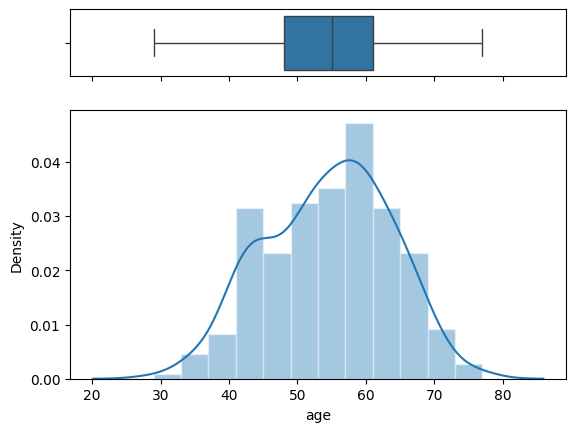

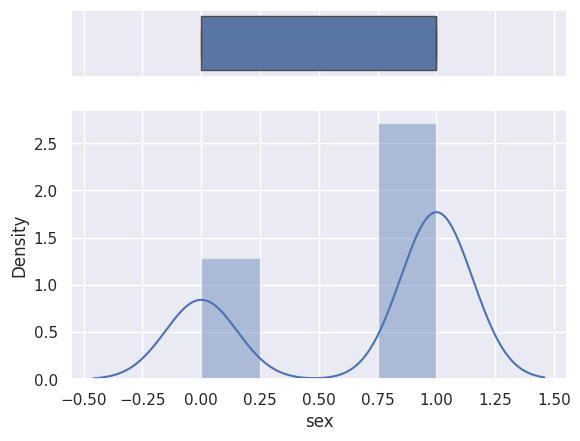

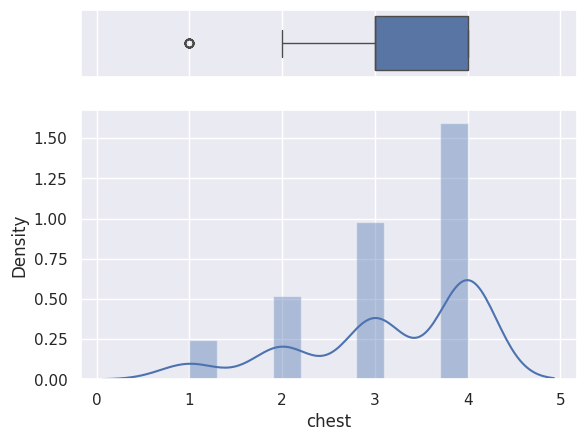

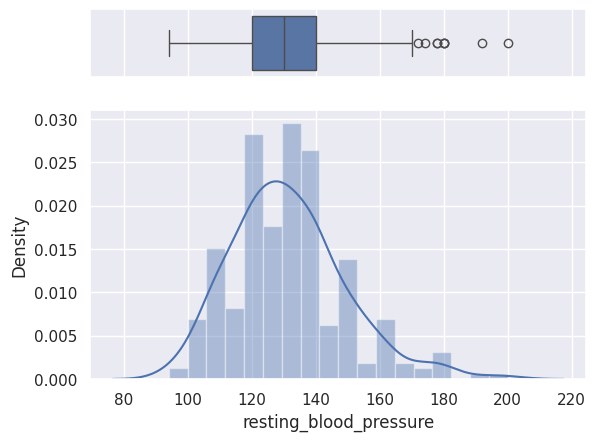

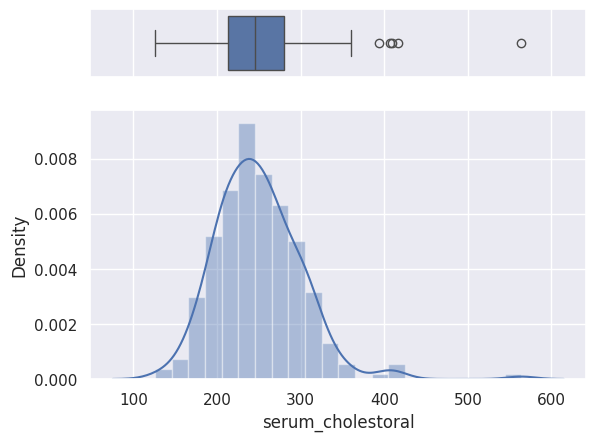

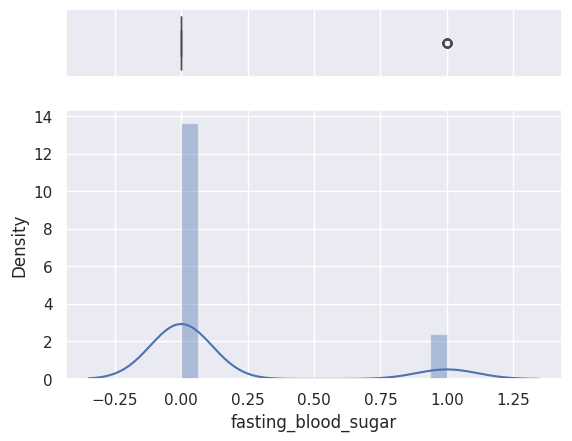

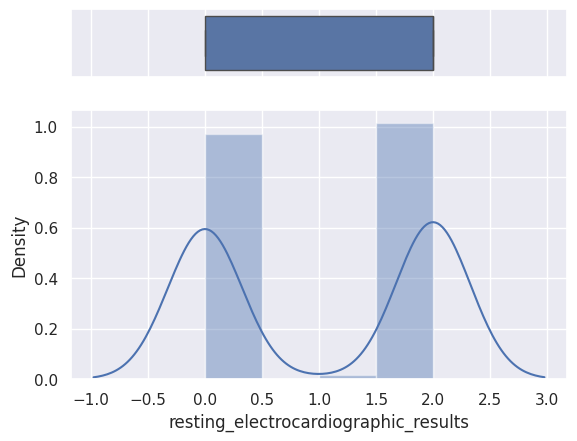

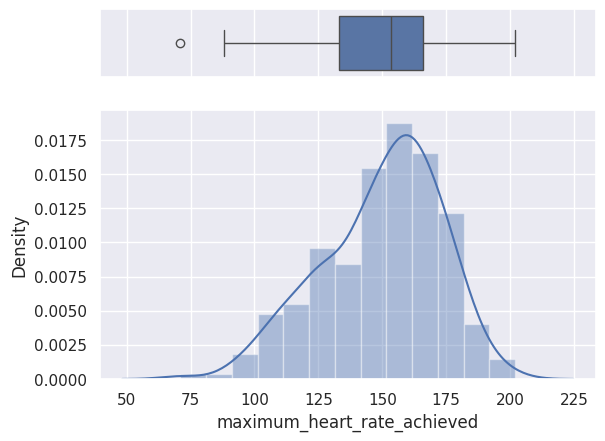

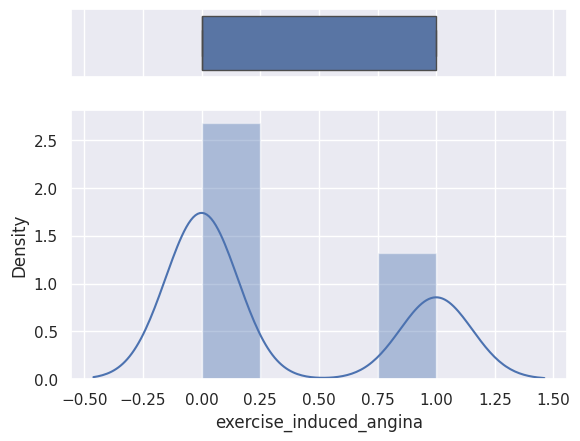

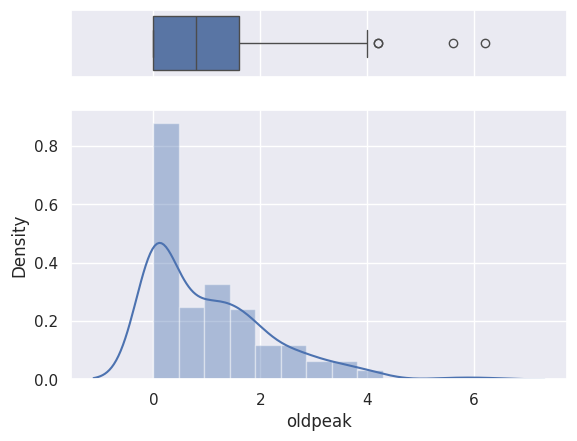

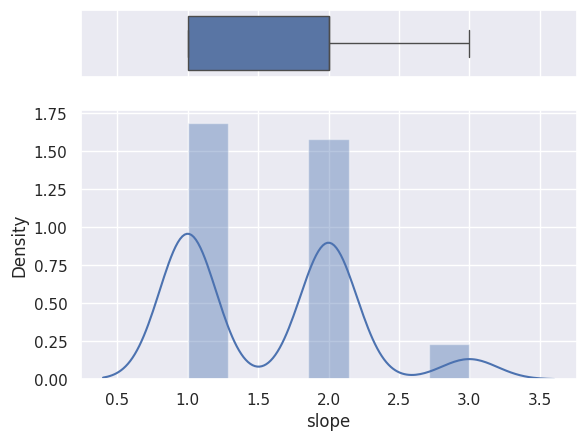

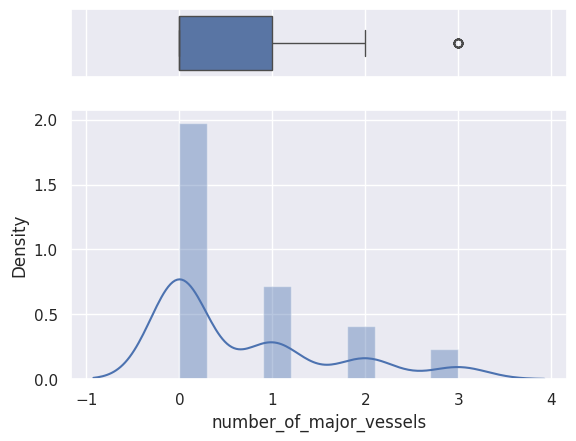

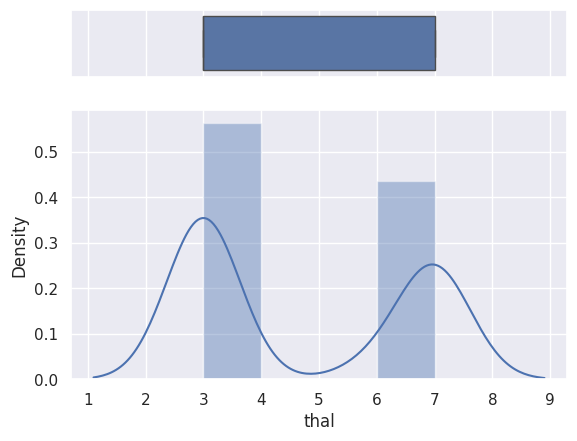

In [ ]:
#Analisis exploratorio
for c in data.columns:
  if c != 'class':
      f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.20, .80)})
      sns.set_theme(style="darkgrid")

          # Add a graph in each part
      sns.boxplot(data[c], ax=ax_box, orient="h")
      sns.distplot(data[c], ax=ax_hist)
      ax_box.set(xlabel=c)
      plt.show()

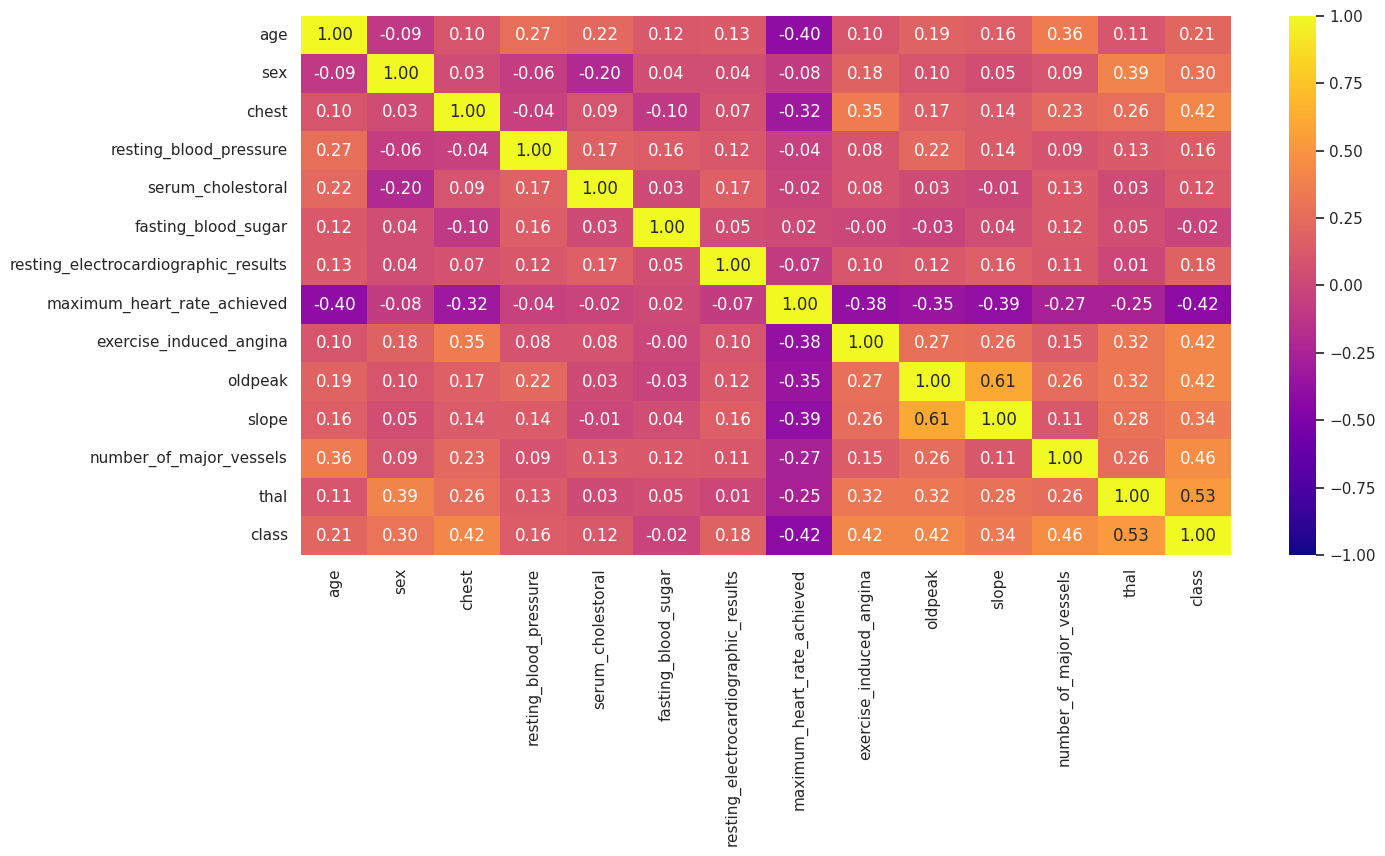

In [ ]:
#Matriz de correlacion
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='plasma')
plt.show()

<Figure size 2000x2000 with 0 Axes>

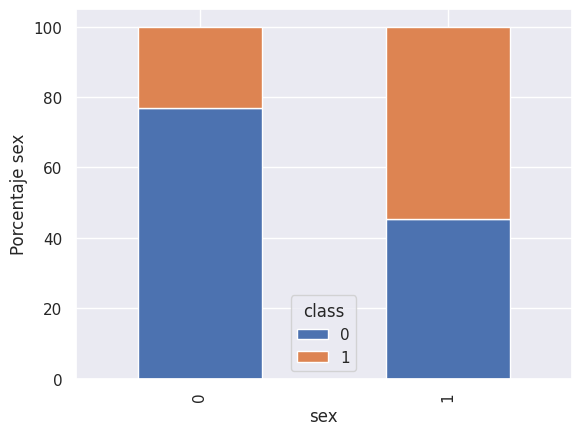

<Figure size 2000x2000 with 0 Axes>

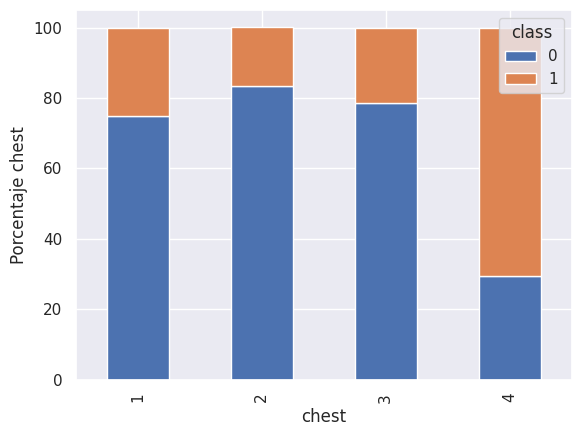

<Figure size 2000x2000 with 0 Axes>

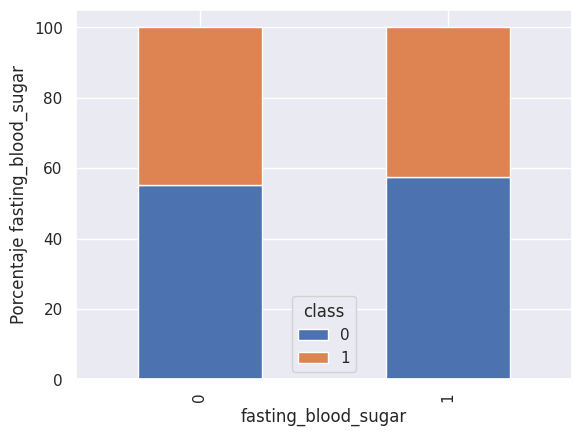

<Figure size 2000x2000 with 0 Axes>

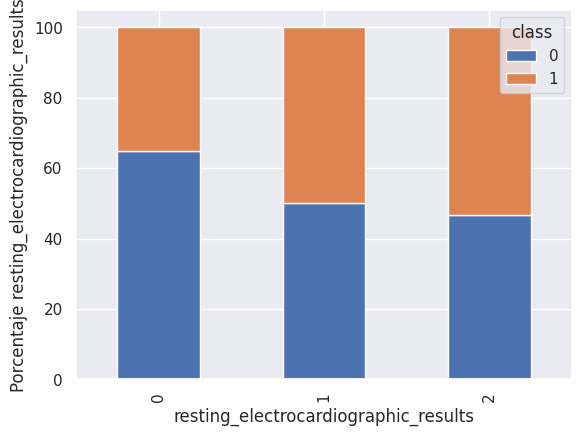

<Figure size 2000x2000 with 0 Axes>

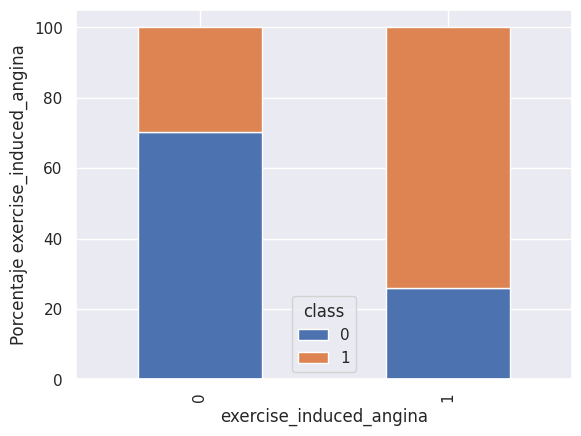

<Figure size 2000x2000 with 0 Axes>

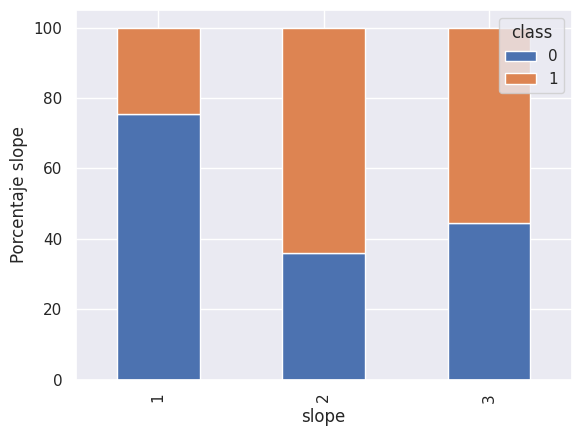

<Figure size 2000x2000 with 0 Axes>

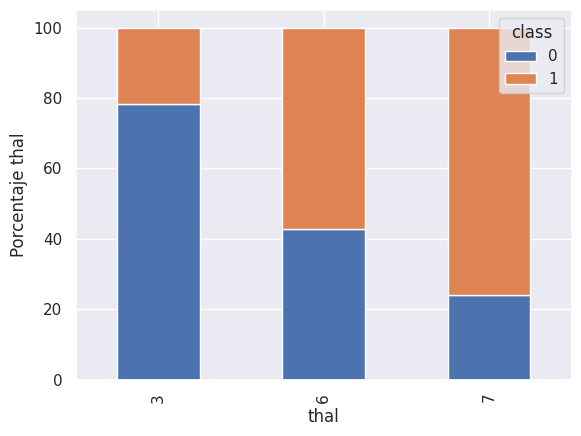

<Figure size 2000x2000 with 0 Axes>

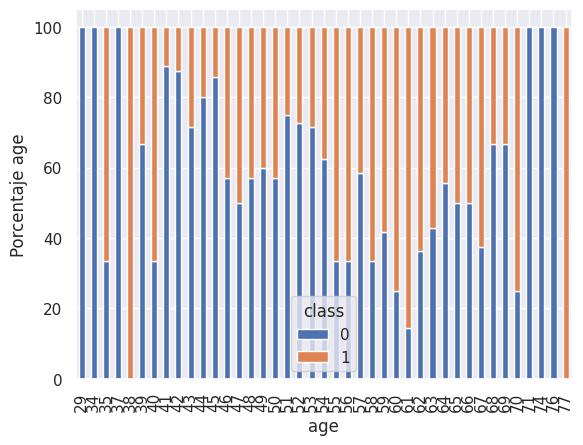

In [ ]:
variables_numericas = ['age', 'resting_blood_pressure', 'serum_cholestoral',
                'maximum_heart_rate_achieved', 'oldpeak', 'number_of_major_vessels']

variables_categoricas = ['sex', 'chest', 'fasting_blood_sugar', 'resting_electrocardiographic_results',
                    'exercise_induced_angina', 'slope', 'thal']
for c in variables_categoricas + ['age']:
  if c != 'class':
      plt.figure(figsize=(20, 20))
      (pd.crosstab(data[c], data['class'], normalize='index')*100).plot(kind='bar', stacked=True)
      plt.ylabel(f'Porcentaje {c}')

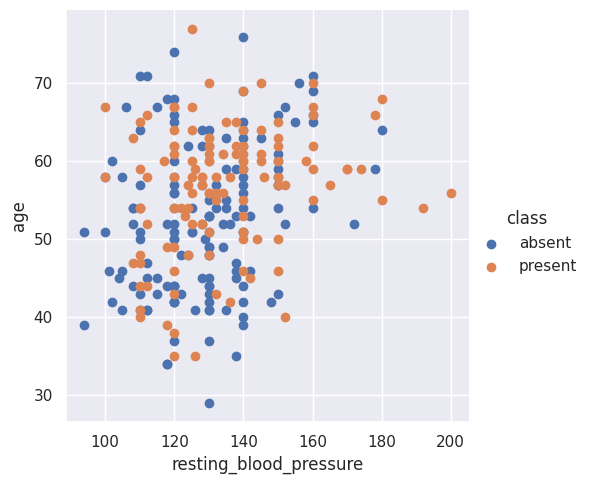

In [ ]:
sns.FacetGrid(df, hue='class', height=5).map(plt.scatter, "resting_blood_pressure", 'age').add_legend()

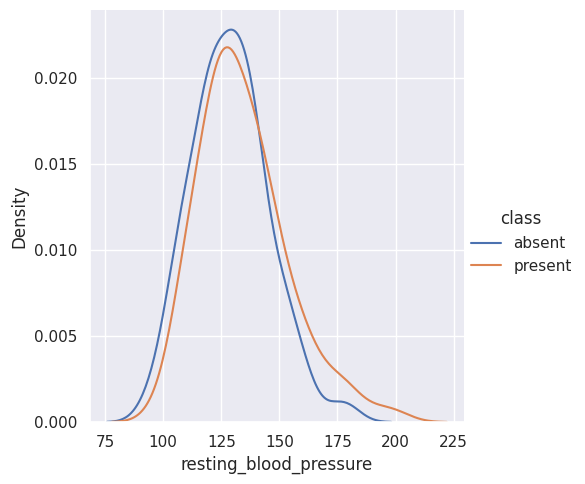

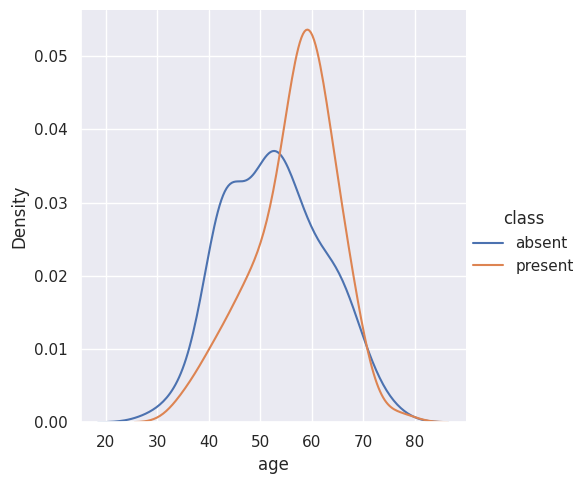

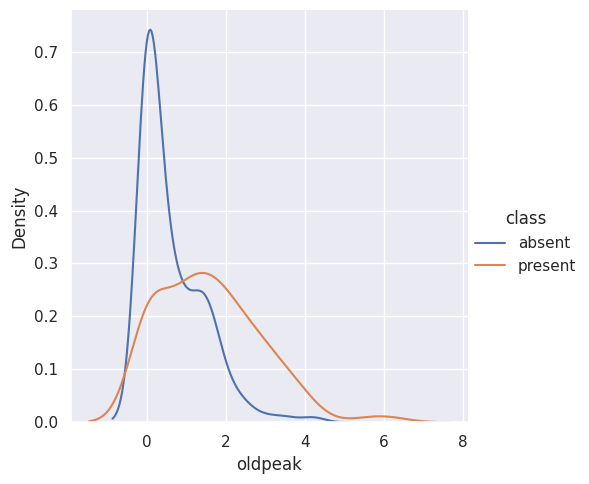

In [ ]:
sns.FacetGrid(df, hue='class', height=5).map(sns.kdeplot, "resting_blood_pressure").add_legend()
sns.FacetGrid(df, hue='class', height=5).map(sns.kdeplot, "age").add_legend()
sns.FacetGrid(df, hue='class', height=5).map(sns.kdeplot, "oldpeak").add_legend()

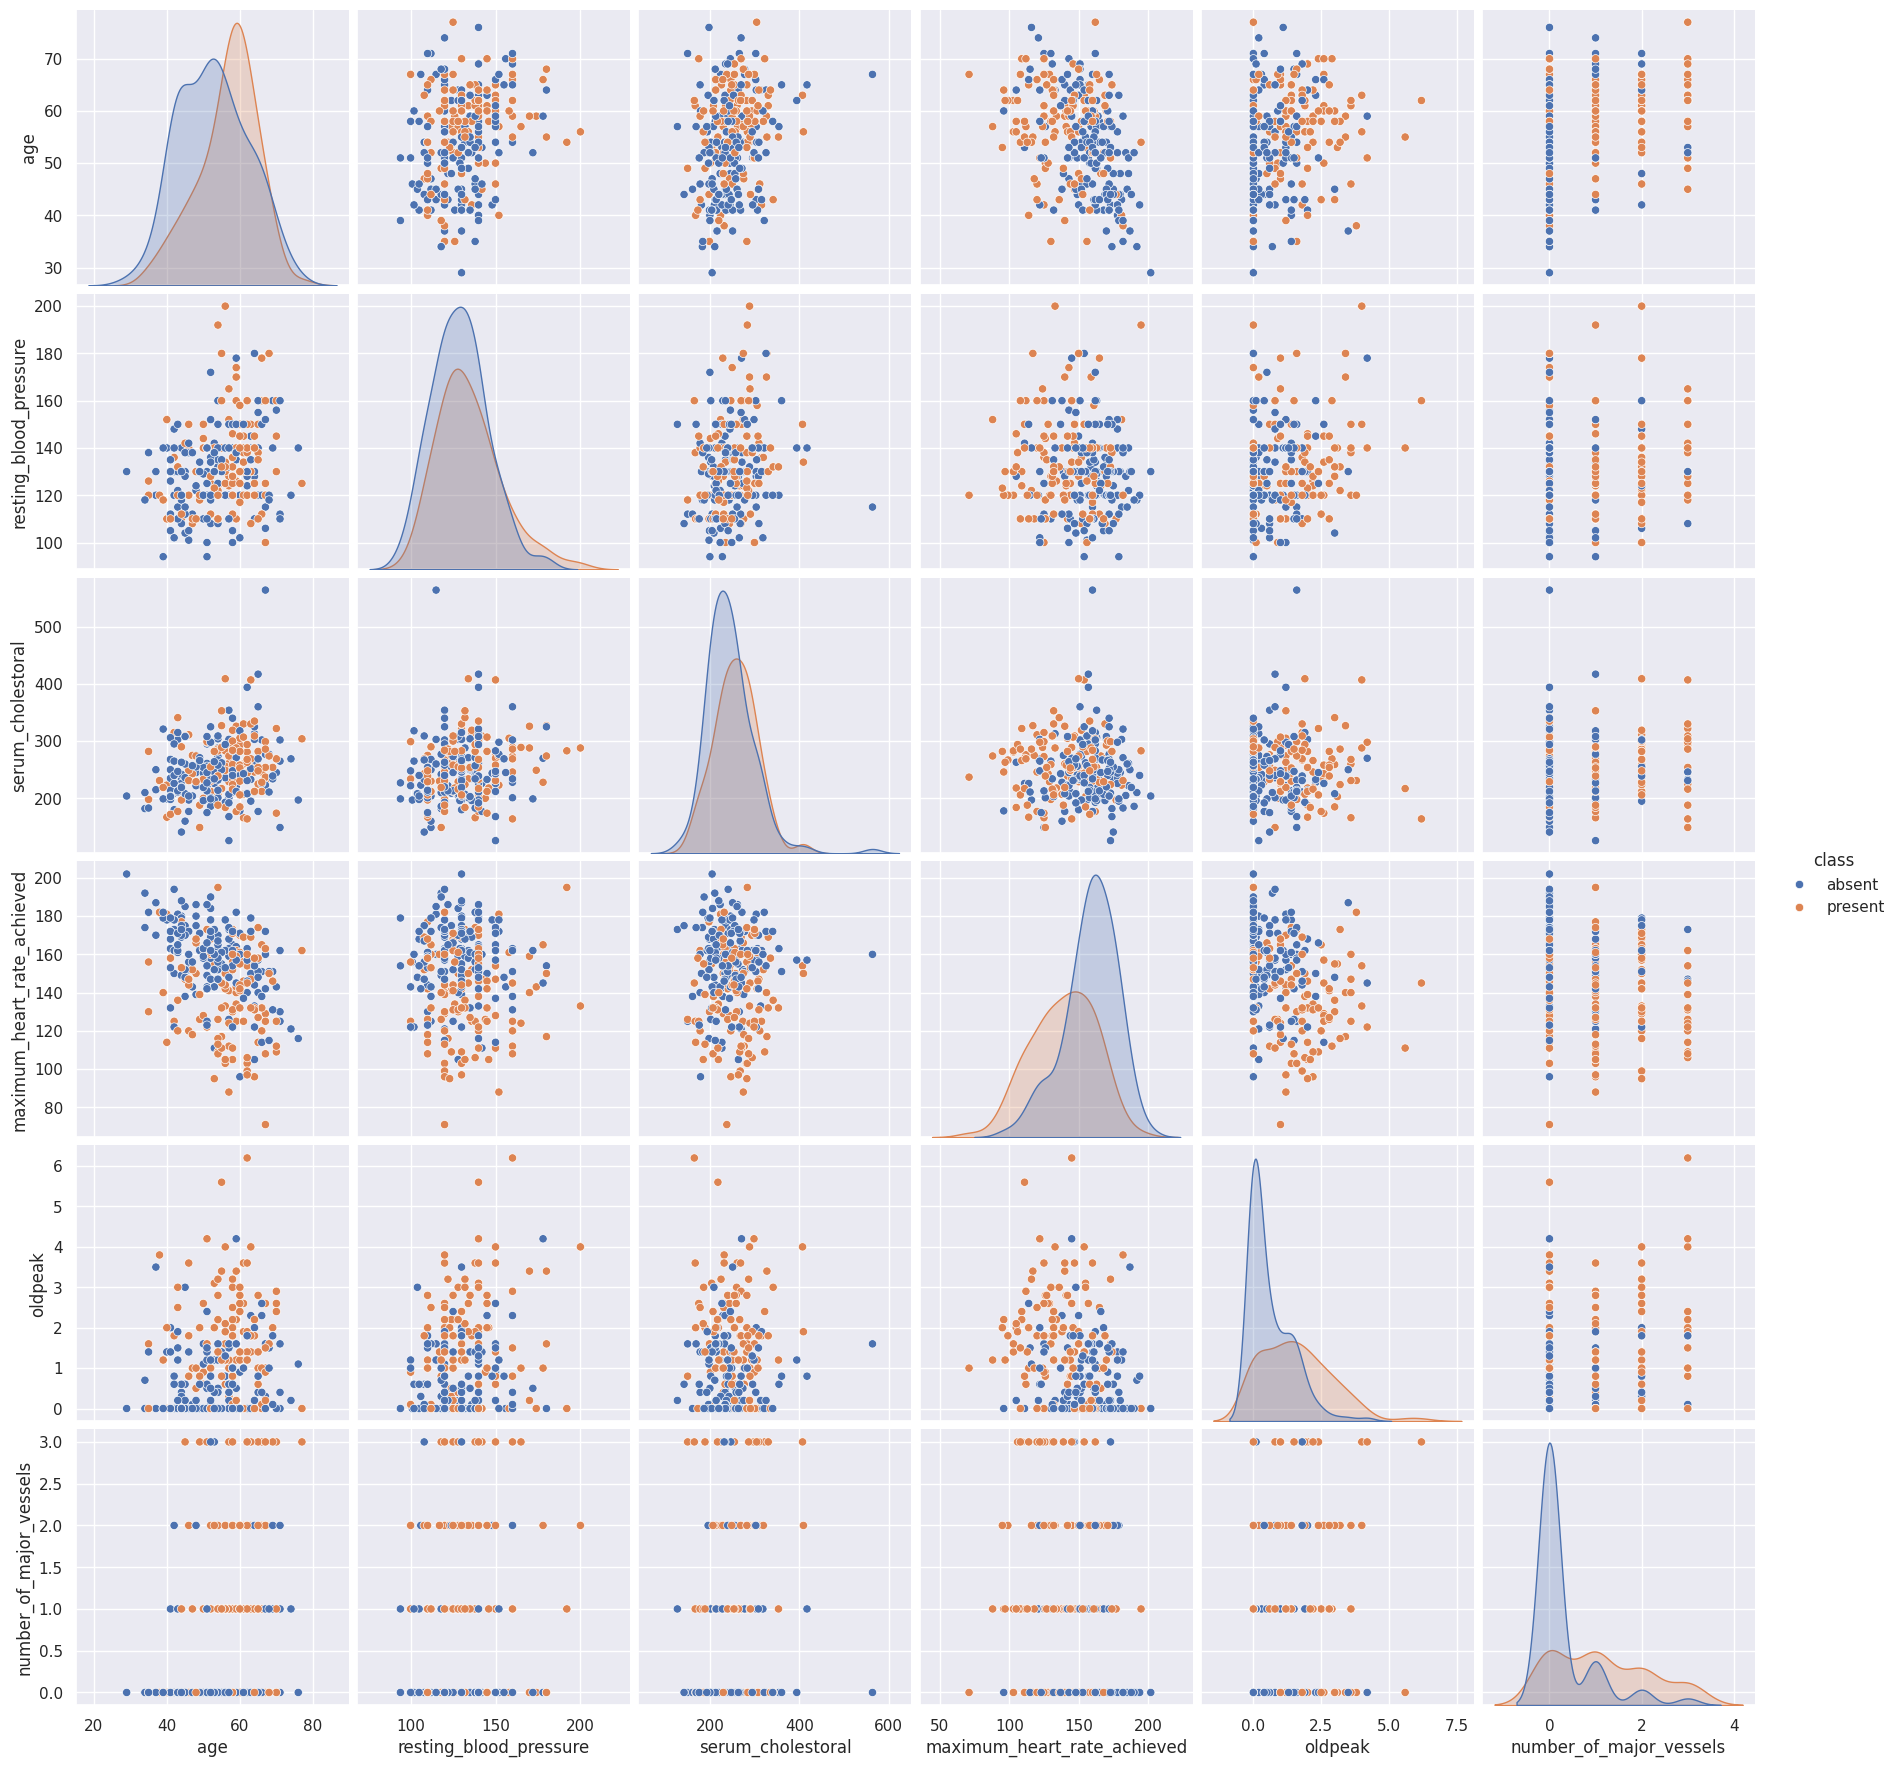

In [ ]:
sns.pairplot(df[variables_numericas + ["class"]],hue="class",height=3)


In [ ]:
#x=variables explicativas
#y=la clase
X = data.drop(["class"],axis=1)
Y = data["class"]

In [ ]:
print(X.shape)
print(type(X))
print(type(Y))

In [ ]:
#Dividir el data set en train 70% y un test 30%
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, stratify=Y)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
#Codificar variables categoricas
X_train=pd.get_dummies(X_train,columns=variables_categoricas,drop_first=True)
X_test=pd.get_dummies(X_test,columns=variables_categoricas,drop_first=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(189, 17)
(81, 18)


In [ ]:
X_train.head()

,age,resting_blood_pressure,serum_cholestoral,maximum_heart_rate_achieved,oldpeak,number_of_major_vessels,sex_1,chest_2,chest_3,chest_4,fasting_blood_sugar_1,resting_electrocardiographic_results_2,exercise_induced_angina_1,slope_2,slope_3,thal_6,thal_7
79,56,120,236,178,0.8,0,True,True,False,False,False,False,False,False,False,False,False
82,58,150,270,111,0.8,0,True,False,False,True,False,True,True,False,False,False,True
116,46,120,249,144,0.8,0,True,False,False,True,False,True,False,False,False,False,True
188,62,140,394,157,1.2,0,False,False,False,True,False,True,False,True,False,False,False
80,58,146,218,105,2.0,1,True,False,False,True,False,False,False,True,False,False,True


In [ ]:
#Funcion metricas
def metrics_score(actual, predicted, labels=['Not Attrite', 'Attrite']):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    print(cm)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
treeclass = DecisionTreeClassifier(max_depth=5, random_state=1)
treeclass.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

[Text(0.5845588235294118, 0.9166666666666666, 'node #0\nthal_7 <= 0.5\ngini = 0.494\nsamples = 189\nvalue = [105, 84]\nclass = absence'),
 Text(0.33088235294117646, 0.75, 'node #1\nnumber_of_major_vessels <= 0.5\ngini = 0.371\nsamples = 114\nvalue = [86, 28]\nclass = absence'),
 Text(0.45772058823529416, 0.8333333333333333, 'True  '),
 Text(0.14705882352941177, 0.5833333333333334, 'node #2\nage <= 57.5\ngini = 0.204\nsamples = 78\nvalue = [69, 9]\nclass = absence'),
 Text(0.08823529411764706, 0.4166666666666667, 'node #3\noldpeak <= 2.8\ngini = 0.075\nsamples = 51\nvalue = [49, 2]\nclass = absence'),
 Text(0.058823529411764705, 0.25, 'node #4\nresting_blood_pressure <= 109.0\ngini = 0.039\nsamples = 50\nvalue = [49, 1]\nclass = absence'),
 Text(0.029411764705882353, 0.08333333333333333, 'node #5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = absence'),
 Text(0.08823529411764706, 0.08333333333333333, 'node #6\ngini = 0.0\nsamples = 44\nvalue = [44, 0]\nclass = absence'),
 Text(0.11

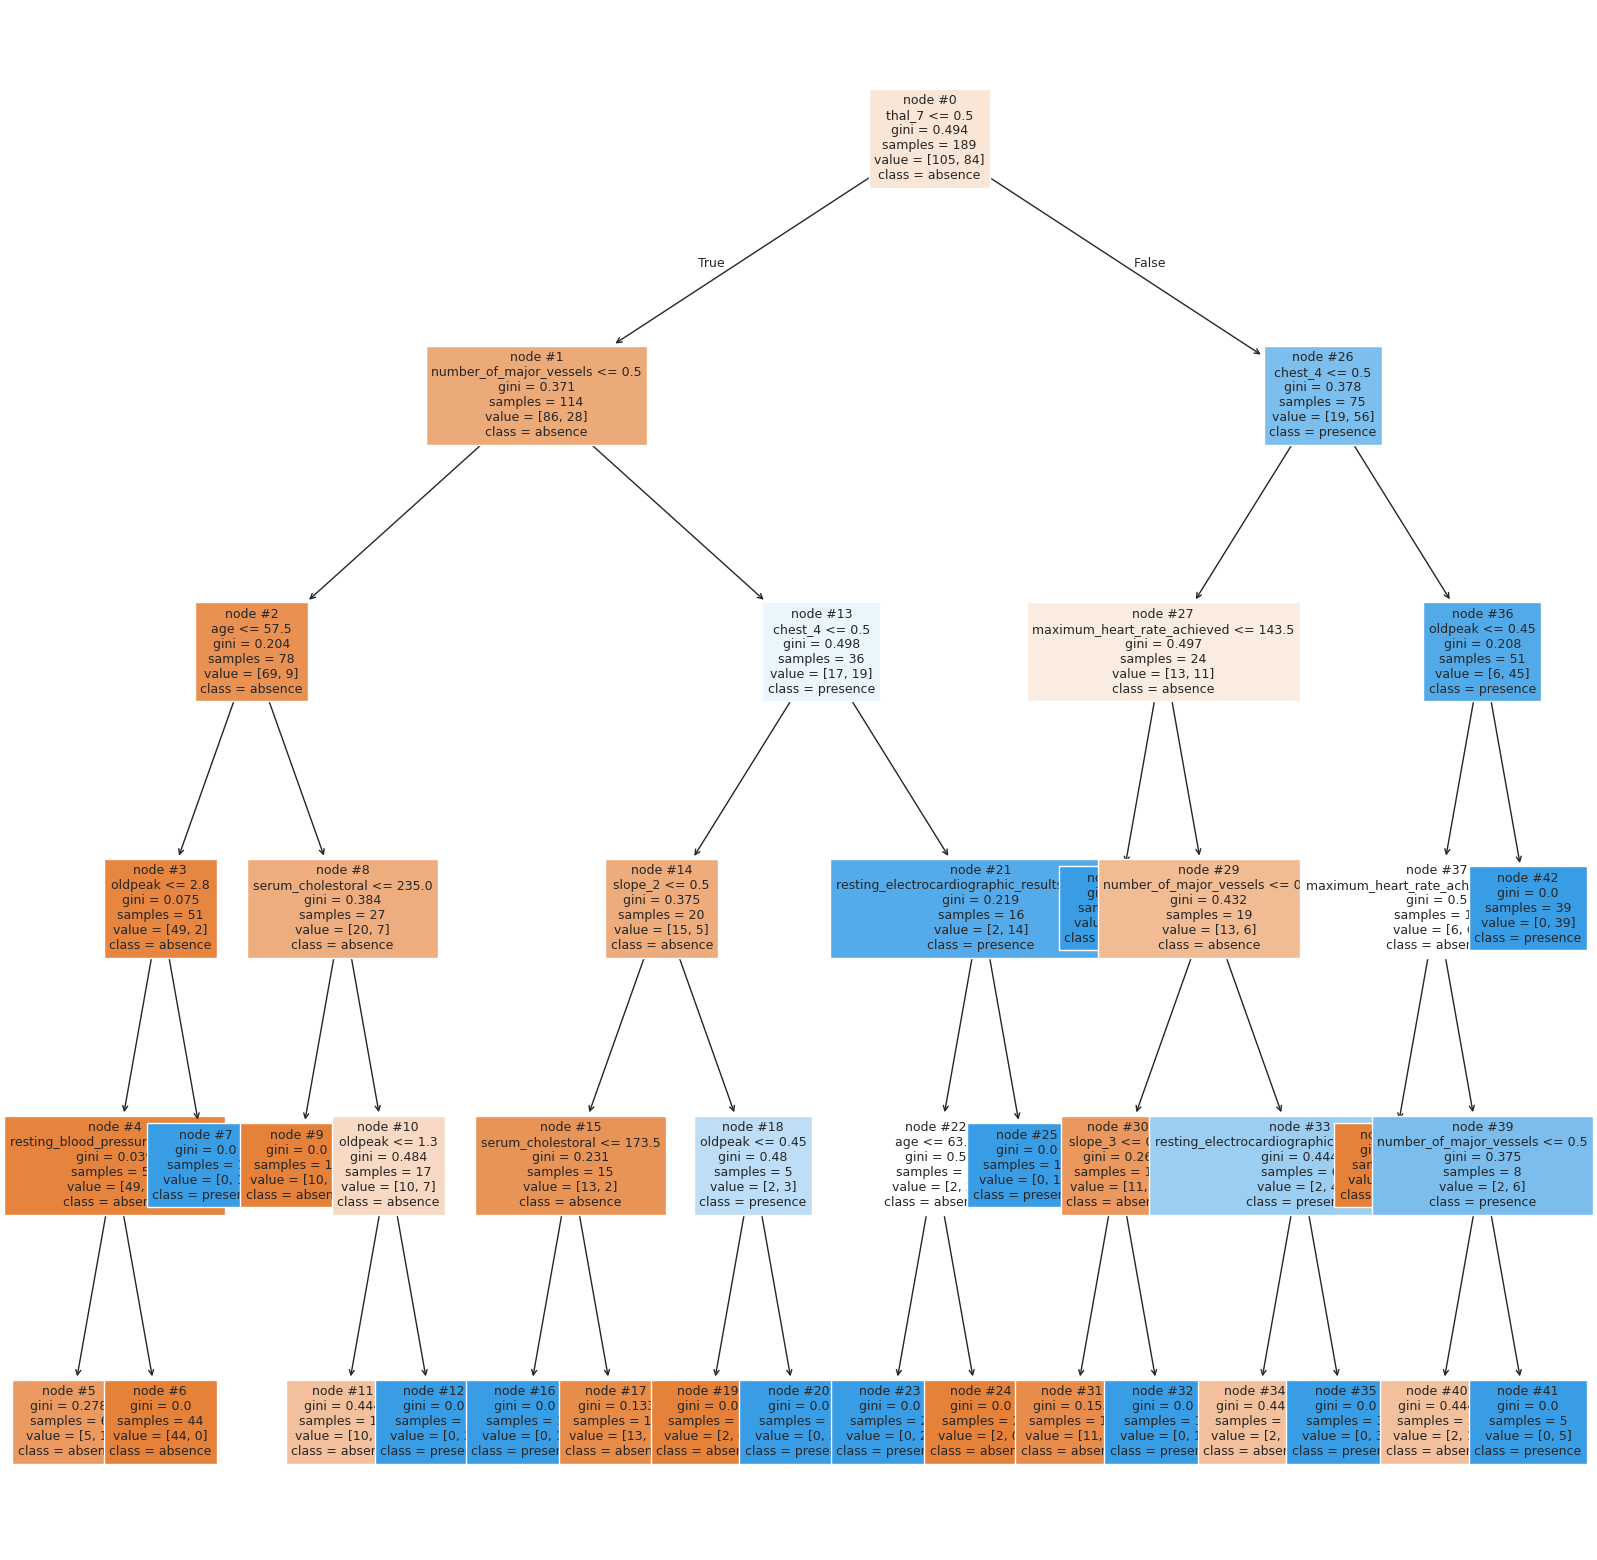

In [ ]:
#Graficar el arbol
features = list(X_train.columns)
plt.figure(figsize=[20,20])
class_name=["absence","presence"]
tree.plot_tree(treeclass, feature_names=features, max_depth=5, filled=True, fontsize=9, node_ids=True, class_names=class_name)